In [ ]:
#importing neccesary libraries
#preparing a cnn model for image classification for cat vs dog
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tqdm import tqdm  
import numpy as np

Using TensorFlow backend.


In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras.utils import np_utils 
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math


from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

In [ ]:
import os
import zipfile

In [ ]:
pip install opencv-python

In [ ]:
#taking a dataset of cat vs dog from kaggle having 2000 images
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-26 13:48:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2020-06-26 13:48:31 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.574.jpg', 'cat.914.jpg', 'cat.261.jpg', 'cat.889.jpg', 'cat.247.jpg', 'cat.428.jpg', 'cat.85.jpg', 'cat.771.jpg', 'cat.813.jpg', 'cat.379.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
#lets see images with the help of matplotlib and setting parameters
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 
nrows = 4
ncols = 4


pic_index = 0

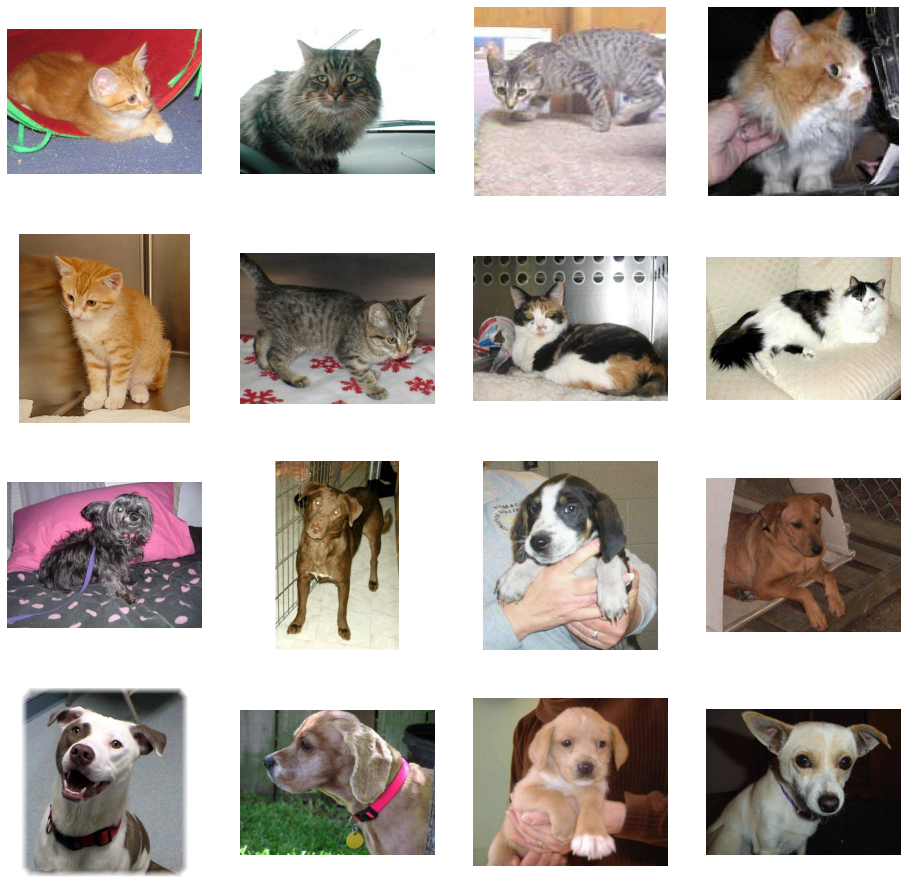

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
#lets have a look at the images without gridlines

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
#as its a two class classifcation (dog vs cat)
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])#optimezer like adam can also be used

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#generating labels for our dataset  and rescaling


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=8,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)
#training accuracy as high as 93 while validation accuracy low as 73

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
100/100 - 56s - loss: 0.8867 - acc: 0.5540 - val_loss: 0.7622 - val_acc: 0.5170
Epoch 2/8
100/100 - 55s - loss: 0.6278 - acc: 0.6440 - val_loss: 0.5950 - val_acc: 0.7000
Epoch 3/8
100/100 - 55s - loss: 0.5387 - acc: 0.7295 - val_loss: 0.6044 - val_acc: 0.6930
Epoch 4/8
100/100 - 55s - loss: 0.4595 - acc: 0.7845 - val_loss: 0.6064 - val_acc: 0.6880
Epoch 5/8
100/100 - 55s - loss: 0.3650 - acc: 0.8385 - val_loss: 0.6913 - val_acc: 0.6850
Epoch 6/8
100/100 - 55s - loss: 0.2666 - acc: 0.8845 - val_loss: 0.6448 - val_acc: 0.7320
Epoch 7/8
100/100 - 55s - loss: 0.1782 - acc: 0.9325 - val_loss: 0.8184 - val_acc: 0.7200
Epoch 8/8
100/100 - 55s - loss: 0.1170 - acc: 0.9555 - val_loss: 1.0106 - val_acc: 0.7360


In [ ]:
#lets plot a histogram to compare the training accuracy and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

# a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# number of epochs
epochs = range(len(acc))#here length is 8 of epoch

In [ ]:
epochs#range of epoch

range(0, 8)

Text(0.5, 1.0, 'Training and validation loss')

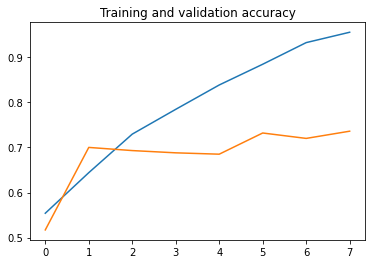

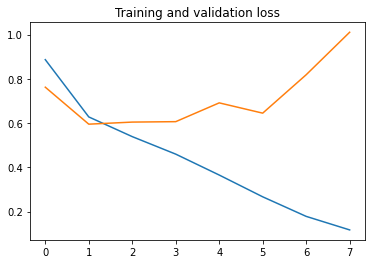

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
#we can see accuracy for training is high while for validation is low as we have taken a smaller dataset
#blue line touches almost 100 indicating training accuracy while validation accuracy low as 70